<a href="https://colab.research.google.com/github/SUYAMBULAKSHMI-VENKATESAN/DAMAKA/blob/main/Segmentation_Superpixel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+------------------+------------------------------+----------+------------+-----------+
| Stage            | Parameters                   | Method   | Mean       | Std Dev   |
+==================+==============================+==========+============+===========+
| Blurred Image    | (5, 5)                       | -        | Mean=98.18 | Std=29.16 |
+------------------+------------------------------+----------+------------+-----------+
| SLIC Superpixels | Segments=200, Compactness=10 | skimage  | Mean=97.60 | Std=28.45 |
+------------------+------------------------------+----------+------------+-----------+


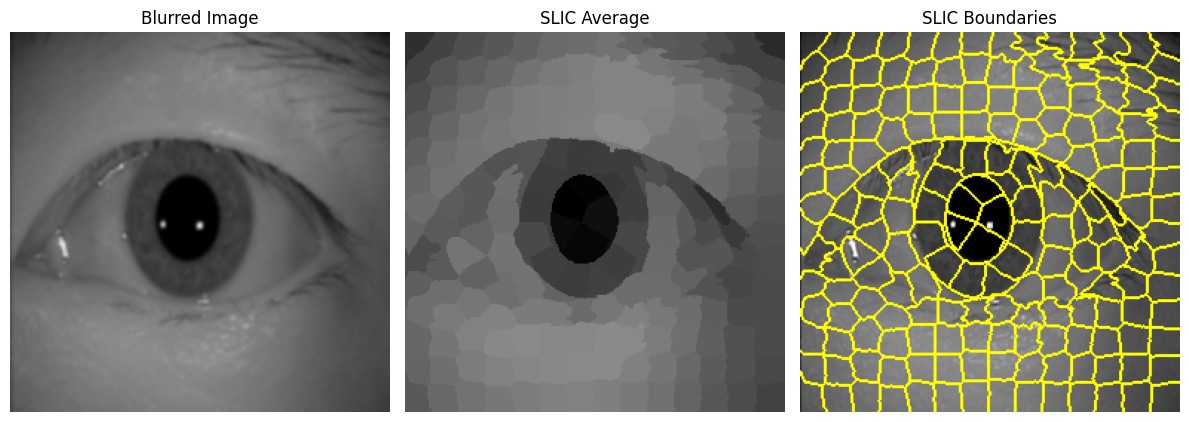

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.color import label2rgb
from tabulate import tabulate

def apply_superpixel_segmentation(image_path):
    # Load and resize image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    image_rgb = cv2.cvtColor(cv2.resize(image, (256, 256)), cv2.COLOR_BGR2RGB)

    # Apply Gaussian Blur
    blur_kernel_size = (5, 5)
    blurred = cv2.GaussianBlur(image_rgb, blur_kernel_size, 0)

    # SLIC Superpixel segmentation
    n_segments = 200
    compactness = 10
    slic_segments = slic(blurred, n_segments=n_segments, compactness=compactness, start_label=1)

    # Create segmented image with label boundaries
    segmented_img = label2rgb(slic_segments, image_rgb, kind='avg')
    boundary_img = segmentation.mark_boundaries(image_rgb, slic_segments)

    # Metrics
    table_data = [
        ["Blurred Image", str(blur_kernel_size), "-", f"Mean={np.mean(blurred):.2f}", f"Std={np.std(blurred):.2f}"],
        ["SLIC Superpixels", f"Segments={n_segments}, Compactness={compactness}", "skimage", f"Mean={np.mean(segmented_img):.2f}", f"Std={np.std(segmented_img):.2f}"],
    ]

    headers = ["Stage", "Parameters", "Method", "Mean", "Std Dev"]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

    # Display images
    titles = ["Blurred Image", "SLIC Average", "SLIC Boundaries"]
    images = [blurred, segmented_img, boundary_img]

    plt.figure(figsize=(12, 6))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    return table_data

# Example usage:
result = apply_superpixel_segmentation("/content/S6000S00.jpg")